# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection-dataset/Readme.md
/kaggle/input/fraud-detection-dataset/Src/data.py
/kaggle/input/fraud-detection-dataset/Data/Customer Profiles/account_activity.csv
/kaggle/input/fraud-detection-dataset/Data/Customer Profiles/customer_data.csv
/kaggle/input/fraud-detection-dataset/Data/Transaction Data/transaction_metadata.csv
/kaggle/input/fraud-detection-dataset/Data/Transaction Data/transaction_records.csv
/kaggle/input/fraud-detection-dataset/Data/Merchant Information/transaction_category_labels.csv
/kaggle/input/fraud-detection-dataset/Data/Merchant Information/merchant_data.csv
/kaggle/input/fraud-detection-dataset/Data/Transaction Amounts/amount_data.csv
/kaggle/input/fraud-detection-dataset/Data/Transaction Amounts/anomaly_scores.csv
/kaggle/input/fraud-detection-dataset/Data/Fraudulent Patterns/suspicious_activity.csv
/kaggle/input/fraud-detection-dataset/Data/Fraudulent Patterns/fraud_indicators.csv


# Customer Profiles

In [2]:
base_dir= "../input/fraud-detection-dataset/Data"
customer_data = pd.read_csv(f"{base_dir}/Customer Profiles/customer_data.csv")
account_activity = pd.read_csv(f"{base_dir}/Customer Profiles/account_activity.csv")


In [7]:
customer_data

,CustomerID,Name,Age,Address
0,1001,Customer 1001,54,Address 1001
1,1002,Customer 1002,35,Address 1002
2,1003,Customer 1003,40,Address 1003
3,1004,Customer 1004,30,Address 1004
4,1005,Customer 1005,46,Address 1005
...,...,...,...,...
995,1996,Customer 1996,33,Address 1996
996,1997,Customer 1997,58,Address 1997
997,1998,Customer 1998,25,Address 1998
998,1999,Customer 1999,57,Address 1999


In [8]:
account_activity

,CustomerID,AccountBalance,LastLogin
0,1001,9507.272060,2022-01-01
1,1002,7408.704536,2022-01-02
2,1003,1715.321989,2022-01-03
3,1004,3101.509134,2022-01-04
4,1005,5405.766914,2022-01-05
...,...,...,...
995,1996,8523.485163,2024-09-22
996,1997,9255.451757,2024-09-23
997,1998,9148.652759,2024-09-24
998,1999,7376.854107,2024-09-25


In [10]:
customer_df = pd.merge(customer_data,account_activity)
customer_df

,CustomerID,Name,Age,Address,AccountBalance,LastLogin
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05
...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25


In [11]:
customer_df.describe()

,CustomerID,Age,AccountBalance
count,1000.000000,1000.000000,1000.000000
mean,1500.500000,39.892000,5558.067698
std,288.819436,13.524394,2596.890997
min,1001.000000,18.000000,1009.248716
25%,1250.750000,28.000000,3297.255763
50%,1500.500000,39.000000,5569.672709
75%,1750.250000,51.000000,7910.029699
max,2000.000000,64.000000,9999.776239


- The average age of customers is 18 years

- The minimum account balance is $1009

<Axes: >

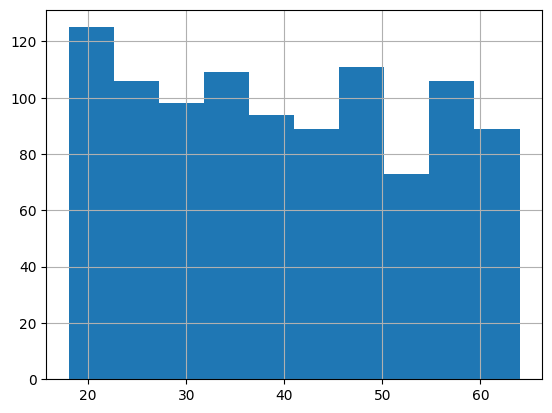

In [12]:
customer_df.Age.hist()

<Axes: title={'center': 'AccountBalance Curve'}>

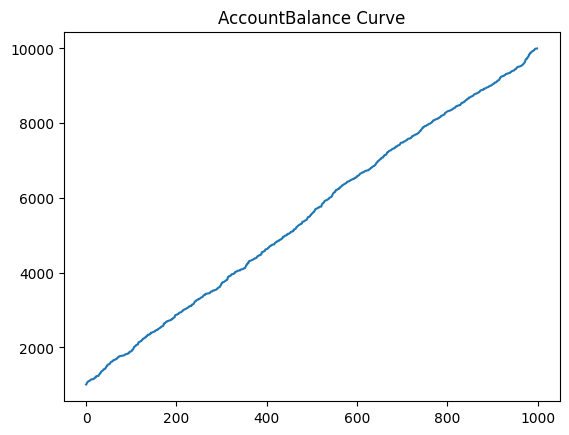

In [16]:
pd.Series(sorted(customer_df.AccountBalance)).plot(title= "AccountBalance Curve")

# Transaction Data

In [3]:
transaction_records = pd.read_csv(f"{base_dir}/Transaction Data/transaction_records.csv")
transaction_metadata = pd.read_csv(f"{base_dir}/Transaction Data/transaction_metadata.csv")
transaction_category_labels = pd.read_csv(f"{base_dir}/Merchant Information/transaction_category_labels.csv")


In [17]:
transaction_records

,TransactionID,Amount,CustomerID
0,1,55.530334,1952
1,2,12.881180,1027
2,3,50.176322,1955
3,4,41.634001,1796
4,5,78.122853,1946
...,...,...,...
995,996,19.876750,1411
996,997,96.299792,1566
997,998,75.164459,1654
998,999,93.633040,1928


In [18]:
transaction_metadata

,TransactionID,Timestamp,MerchantID
0,1,2022-01-01 00:00:00,2701
1,2,2022-01-01 01:00:00,2070
2,3,2022-01-01 02:00:00,2238
3,4,2022-01-01 03:00:00,2879
4,5,2022-01-01 04:00:00,2966
...,...,...,...
995,996,2022-02-11 11:00:00,2150
996,997,2022-02-11 12:00:00,2888
997,998,2022-02-11 13:00:00,2037
998,999,2022-02-11 14:00:00,2629


In [33]:
transaction_category_labels

,TransactionID,Category
0,1,Other
1,2,Online
2,3,Travel
3,4,Travel
4,5,Other
...,...,...
995,996,Food
996,997,Retail
997,998,Food
998,999,Travel


In [35]:
transaction_df = pd.merge(pd.merge(transaction_records,transaction_metadata), transaction_category_labels)
transaction_df

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,Category
0,1,55.530334,1952,2022-01-01 00:00:00,2701,Other
1,2,12.881180,1027,2022-01-01 01:00:00,2070,Online
2,3,50.176322,1955,2022-01-01 02:00:00,2238,Travel
3,4,41.634001,1796,2022-01-01 03:00:00,2879,Travel
4,5,78.122853,1946,2022-01-01 04:00:00,2966,Other
...,...,...,...,...,...,...
995,996,19.876750,1411,2022-02-11 11:00:00,2150,Food
996,997,96.299792,1566,2022-02-11 12:00:00,2888,Retail
997,998,75.164459,1654,2022-02-11 13:00:00,2037,Food
998,999,93.633040,1928,2022-02-11 14:00:00,2629,Travel


In [25]:
transaction_df.Timestamp.min(), transaction_df.Timestamp.max()

('2022-01-01 00:00:00', '2022-02-11 15:00:00')

# Transaction Amounts

In [4]:
amount_data = pd.read_csv(f"{base_dir}/Transaction Amounts/amount_data.csv")
anomaly_scores = pd.read_csv(f"{base_dir}/Transaction Amounts/anomaly_scores.csv")


In [21]:
amount_data

,TransactionID,TransactionAmount
0,1,79.413607
1,2,12.053087
2,3,33.310357
3,4,46.121117
4,5,54.051618
...,...,...
995,996,89.457059
996,997,47.958030
997,998,64.210046
998,999,64.684167


In [22]:
anomaly_scores

,TransactionID,AnomalyScore
0,1,0.686699
1,2,0.081749
2,3,0.023857
3,4,0.876994
4,5,0.034059
...,...,...
995,996,0.266778
996,997,0.512483
997,998,0.367740
998,999,0.960364


In [27]:
amount_df = pd.merge(amount_data, anomaly_scores)
amount_df

,TransactionID,TransactionAmount,AnomalyScore
0,1,79.413607,0.686699
1,2,12.053087,0.081749
2,3,33.310357,0.023857
3,4,46.121117,0.876994
4,5,54.051618,0.034059
...,...,...,...
995,996,89.457059,0.266778
996,997,47.958030,0.512483
997,998,64.210046,0.367740
998,999,64.684167,0.960364


# Merchant Information

In [5]:
merchant_data = pd.read_csv(f"{base_dir}/Merchant Information/merchant_data.csv")


In [28]:
merchant_data

,MerchantID,MerchantName,Location
0,2001,Merchant 2001,Location 2001
1,2002,Merchant 2002,Location 2002
2,2003,Merchant 2003,Location 2003
3,2004,Merchant 2004,Location 2004
4,2005,Merchant 2005,Location 2005
...,...,...,...
995,2996,Merchant 2996,Location 2996
996,2997,Merchant 2997,Location 2997
997,2998,Merchant 2998,Location 2998
998,2999,Merchant 2999,Location 2999


In [30]:
merchant_data.Location.value_counts()

Location
Location 2001    1
Location 2672    1
Location 2659    1
Location 2660    1
Location 2661    1
                ..
Location 2339    1
Location 2340    1
Location 2341    1
Location 2342    1
Location 3000    1
Name: count, Length: 1000, dtype: int64

# Fraudulent Patterns

In [6]:
fraud_indicators = pd.read_csv(f"{base_dir}/Fraudulent Patterns/fraud_indicators.csv")
suspicious_activity = pd.read_csv(f"{base_dir}/Fraudulent Patterns/suspicious_activity.csv")


In [31]:
fraud_indicators

,TransactionID,FraudIndicator
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


In [32]:
suspicious_activity

,CustomerID,SuspiciousFlag
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0
...,...,...
995,1996,0
996,1997,0
997,1998,0
998,1999,0


In [36]:
fraud_indicators.describe()

,TransactionID,FraudIndicator
count,1000.000000,1000.000000
mean,500.500000,0.045000
std,288.819436,0.207408
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,0.000000
max,1000.000000,1.000000


- our final data has 4.5% fraud 

In [37]:
suspicious_activity.describe()

,CustomerID,SuspiciousFlag
count,1000.000000,1000.000000
mean,1500.500000,0.023000
std,288.819436,0.149978
min,1001.000000,0.000000
25%,1250.750000,0.000000
50%,1500.500000,0.000000
75%,1750.250000,0.000000
max,2000.000000,1.000000


- our final data has 2.3% suspicious activity


In [65]:
Train_data= pd.merge(pd.merge(pd.merge(transaction_df, amount_df),customer_df),merchant_data)
Train_data

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,Category,TransactionAmount,AnomalyScore,Name,Age,Address,AccountBalance,LastLogin,MerchantName,Location
0,1,55.530334,1952,2022-01-01 00:00:00,2701,Other,79.413607,0.686699,Customer 1952,50,Address 1952,2869.689912,2024-08-09,Merchant 2701,Location 2701
1,2,12.881180,1027,2022-01-01 01:00:00,2070,Online,12.053087,0.081749,Customer 1027,46,Address 1027,9527.947107,2022-01-27,Merchant 2070,Location 2070
2,3,50.176322,1955,2022-01-01 02:00:00,2238,Travel,33.310357,0.023857,Customer 1955,34,Address 1955,9288.355525,2024-08-12,Merchant 2238,Location 2238
3,4,41.634001,1796,2022-01-01 03:00:00,2879,Travel,46.121117,0.876994,Customer 1796,33,Address 1796,5588.049942,2024-03-06,Merchant 2879,Location 2879
4,5,78.122853,1946,2022-01-01 04:00:00,2966,Other,54.051618,0.034059,Customer 1946,18,Address 1946,7324.785332,2024-08-03,Merchant 2966,Location 2966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,19.876750,1411,2022-02-11 11:00:00,2150,Food,89.457059,0.266778,Customer 1411,19,Address 1411,1290.323059,2023-02-15,Merchant 2150,Location 2150
996,997,96.299792,1566,2022-02-11 12:00:00,2888,Retail,47.958030,0.512483,Customer 1566,39,Address 1566,7067.831609,2023-07-20,Merchant 2888,Location 2888
997,998,75.164459,1654,2022-02-11 13:00:00,2037,Food,64.210046,0.367740,Customer 1654,51,Address 1654,9088.738359,2023-10-16,Merchant 2037,Location 2037
998,999,93.633040,1928,2022-02-11 14:00:00,2629,Travel,64.684167,0.960364,Customer 1928,60,Address 1928,9352.655675,2024-07-16,Merchant 2629,Location 2629


In [66]:
for col in Train_data.columns:
    print(col,Train_data[col].nunique())

TransactionID 1000
Amount 1000
CustomerID 636
Timestamp 1000
MerchantID 651
Category 5
TransactionAmount 1000
AnomalyScore 1000
Name 636
Age 47
Address 636
AccountBalance 636
LastLogin 636
MerchantName 651
Location 651


In [67]:
Train_data["Timestamp"] = pd.to_datetime(Train_data["Timestamp"])
Train_data["LastLogin"] = pd.to_datetime(Train_data["LastLogin"])
Train_data["Timestamp"] = Train_data["Timestamp"].astype(int)//10**9
Train_data["LastLogin"] = Train_data["LastLogin"].astype(int)//10**9
Train_data = pd.get_dummies(Train_data,columns = ["Category"], dtype=int)
Train_data["Name"] = Train_data["Name"].str.split(" ",expand=True)[1]
Train_data["Address"] = Train_data["Address"].str.split(" ",expand=True)[1]
Train_data["MerchantName"] = Train_data["MerchantName"].str.split(" ",expand=True)[1]
Train_data["Location"] = Train_data["Location"].str.split(" ",expand=True)[1]

In [68]:
Train_data

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,TransactionAmount,AnomalyScore,Name,Age,Address,AccountBalance,LastLogin,MerchantName,Location,Category_Food,Category_Online,Category_Other,Category_Retail,Category_Travel
0,1,55.530334,1952,1640995200,2701,79.413607,0.686699,1952,50,1952,2869.689912,1723161600,2701,2701,0,0,1,0,0
1,2,12.881180,1027,1640998800,2070,12.053087,0.081749,1027,46,1027,9527.947107,1643241600,2070,2070,0,1,0,0,0
2,3,50.176322,1955,1641002400,2238,33.310357,0.023857,1955,34,1955,9288.355525,1723420800,2238,2238,0,0,0,0,1
3,4,41.634001,1796,1641006000,2879,46.121117,0.876994,1796,33,1796,5588.049942,1709683200,2879,2879,0,0,0,0,1
4,5,78.122853,1946,1641009600,2966,54.051618,0.034059,1946,18,1946,7324.785332,1722643200,2966,2966,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,19.876750,1411,1644577200,2150,89.457059,0.266778,1411,19,1411,1290.323059,1676419200,2150,2150,1,0,0,0,0
996,997,96.299792,1566,1644580800,2888,47.958030,0.512483,1566,39,1566,7067.831609,1689811200,2888,2888,0,0,0,1,0
997,998,75.164459,1654,1644584400,2037,64.210046,0.367740,1654,51,1654,9088.738359,1697414400,2037,2037,1,0,0,0,0
998,999,93.633040,1928,1644588000,2629,64.684167,0.960364,1928,60,1928,9352.655675,1721088000,2629,2629,0,0,0,0,1


In [70]:
Train_data = pd.merge(pd.merge(Train_data,suspicious_activity),fraud_indicators)
Train_data

,TransactionID,Amount,CustomerID,Timestamp,MerchantID,TransactionAmount,AnomalyScore,Name,Age,Address,...,LastLogin,MerchantName,Location,Category_Food,Category_Online,Category_Other,Category_Retail,Category_Travel,SuspiciousFlag,FraudIndicator
0,1,55.530334,1952,1640995200,2701,79.413607,0.686699,1952,50,1952,...,1723161600,2701,2701,0,0,1,0,0,0,0
1,2,12.881180,1027,1640998800,2070,12.053087,0.081749,1027,46,1027,...,1643241600,2070,2070,0,1,0,0,0,0,0
2,3,50.176322,1955,1641002400,2238,33.310357,0.023857,1955,34,1955,...,1723420800,2238,2238,0,0,0,0,1,0,0
3,4,41.634001,1796,1641006000,2879,46.121117,0.876994,1796,33,1796,...,1709683200,2879,2879,0,0,0,0,1,0,0
4,5,78.122853,1946,1641009600,2966,54.051618,0.034059,1946,18,1946,...,1722643200,2966,2966,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,19.876750,1411,1644577200,2150,89.457059,0.266778,1411,19,1411,...,1676419200,2150,2150,1,0,0,0,0,0,0
996,997,96.299792,1566,1644580800,2888,47.958030,0.512483,1566,39,1566,...,1689811200,2888,2888,0,0,0,1,0,0,0
997,998,75.164459,1654,1644584400,2037,64.210046,0.367740,1654,51,1654,...,1697414400,2037,2037,1,0,0,0,0,0,0
998,999,93.633040,1928,1644588000,2629,64.684167,0.960364,1928,60,1928,...,1721088000,2629,2629,0,0,0,0,1,0,0


In [71]:
Train_data.to_csv("Train_data.csv",index=False)
Train_data.to_excel("Train_data.xlsx",index=False)